In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from glob import glob 
from fastcore.xtras import load_pickle

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

import matplotx

import pandas as pd 
import numpy as np

%matplotlib inline

In [3]:
all_res = glob('out/**/*.pkl')

In [4]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded['representation']
    num_points = loaded['num_train_points']

    metrics = {
        'representation': loaded['representation'],
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['mean_absolute_error'],
        'max_error': loaded['max_error'],
        'mse': loaded['mean_squared_error']
    }

    compiled_res.append(metrics)


    gpr_metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['gpr_baseline']['mean_absolute_error'],
        'max_error': loaded['gpr_baseline']['max_error'],
        'mse': loaded['gpr_baseline']['mean_squared_error']
    }

    compiled_gpr.append(gpr_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [6]:
compiled_grouped_res = compiled_res.groupby(['representation', 'num_train_points']).agg(['mean', 'std'])

In [7]:
compiled_gpr_grouped = compiled_gpr.groupby(['num_train_points']).agg(['mean', 'std'])

In [8]:
compiled_grouped_res

mae           max_error            \
                                     mean       std      mean       std   
representation num_train_points                                           
inchi          10                     NaN       NaN       NaN       NaN   
               50                1.172027  0.155881  4.063333  0.701593   
               100               1.092187  0.085583  4.280000  0.945992   
               200               1.106540  0.029896  4.605000  0.275772   
               500               0.994840  0.125016  4.330000  1.046518   
iupac_name     10                1.815216       NaN  4.430000       NaN   
               50                1.174240       NaN  4.460000       NaN   
selfies        10                0.995120       NaN  3.700000       NaN   
               50                1.246900  0.038438  4.700000  0.424264   
               100               1.080680       NaN  3.060000       NaN   
               200               1.011080       NaN  3.630000       NaN   
               500               1.008880       NaN  3.800000       NaN   
smiles         10                1.311860  0.388824  4.015000  0.586899   
               50                1.098573  0.055292  4.166667  0.614600   
               100               1.009067  0.012055  3.873333  0.127410   
               200               1.039880  0.055644  3.850000  0.101653   
               500               0.926067  0.056595  3.713333  0.505800   

                                      mse            
                                     mean       std  
representation num_train_points                      
inchi          10                     NaN       NaN  
               50                2.153885  0.508503  
               100               1.898015  0.325697  
               200               2.029607  0.003519  
               500               1.622732  0.508750  
iupac_name     10                4.538035       NaN  
               50                2.237502       NaN  
selfies        10                1.501540       NaN  
               50                2.458462  0.184286  
               100               1.749705       NaN  
               200               1.578111       NaN  
               500               1.607942       NaN  
smiles         10                2.665447  1.507645  
               50                1.918788  0.306139  
               100               1.621708  0.072506  
               200               1.752343  0.238844  
               500               1.406836  0.155101

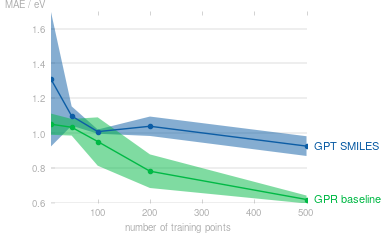

In [9]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1,1)
    # ax.plot(
    #     compiled_grouped_res.loc["SELFIES", :].index, 
    #     compiled_grouped_res.loc["SELFIES", :]['mae']['mean'], 
    #     label='GPT SELFIES', 
    #     marker='o'
    # )

    # ax.fill_between(
    #     compiled_grouped_res.loc["SELFIES", :].index, 
    #     compiled_grouped_res.loc["SELFIES", :]['mae']['mean'] - compiled_grouped_res.loc["SELFIES", :]['mae']['std'], 
    #     compiled_grouped_res.loc["SELFIES", :]['mae']['mean'] + compiled_grouped_res.loc["SELFIES", :]['mae']['std'], 
    # )

    ax.plot(
        compiled_grouped_res.loc["smiles", :].index, 
        compiled_grouped_res.loc["smiles", :]['mae']['mean'], 
        label='GPT SMILES',
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["smiles", :].index, 
        compiled_grouped_res.loc["smiles", :]['mae']['mean'] - compiled_grouped_res.loc["smiles", :]['mae']['std'], 
        compiled_grouped_res.loc["smiles", :]['mae']['mean'] + compiled_grouped_res.loc["smiles", :]['mae']['std'], 
        alpha=.5
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index, 
        compiled_gpr_grouped['mae']['mean'], 
        label='GPR baseline',
        marker='o'
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[ :].index, 
        compiled_gpr_grouped.loc[:]['mae']['mean'] - compiled_gpr_grouped.loc[ :]['mae']['std'], 
        compiled_gpr_grouped.loc[ :]['mae']['mean'] + compiled_gpr_grouped.loc[ :]['mae']['std'], 
        alpha=.5
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel('number of training points', labelpad=4)
    matplotx.ylabel_top('MAE / eV')
    #ax.set_xscale('log')

fig.savefig('lipophilicity_regression_res.pdf', bbox_inches='tight')
